In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 1: Simulate Smart Home Energy Data (for 7 days hourly)

np.random.seed(42)
timestamps = pd.date_range(start="2025-08-01", periods=168, freq='H')  # 7 days * 24 hours
appliances = ["Air Conditioner", "Lights", "Geyser", "Fridge", "Washing Machine"]
rooms = ["Bedroom", "Living Room", "Bathroom", "Kitchen"]
modes = ["Cool", "On", "Heat", "Freeze", "Wash"]

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_27556\4266334678.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2025-08-01", periods=168, freq='H')  # 7 days * 24 hours


In [ ]:
# Create the dataset

df = pd.DataFrame({
    "Timestamp": timestamps,
    "Appliance": np.random.choice(appliances, len(timestamps)),
    "Usage_kWh": np.clip(np.random.normal(1.2, 0.5, len(timestamps)), 0.1, 3.0),
    "Room": np.random.choice(rooms, len(timestamps)),
    "Mode": np.random.choice(modes, len(timestamps)),
    "Temp(C)": np.random.randint(20, 35, len(timestamps))
})

In [ ]:
# Step 2: Data Preprocessing

df['Hour'] = df['Timestamp'].dt.hour
df['Date'] = df['Timestamp'].dt.date
df['Cost(INR)'] = df['Usage_kWh'] * 7.5  # ₹7.5 per unit


Text(0, 0.5, 'Usage (kWh)')

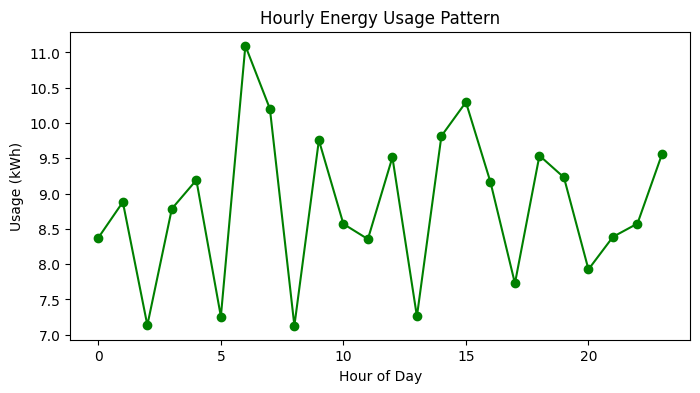

In [60]:
#Hourly Energy Usage

fig, ax = plt.subplots(figsize=(8, 4))
hourly_usage = df.groupby('Hour')['Usage_kWh'].sum()
ax.plot(hourly_usage.index, hourly_usage.values, marker='o', color='green')
ax.set_title("Hourly Energy Usage Pattern")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Usage (kWh)")


Text(0.5, 1.0, 'Usage Distribution by Appliance')

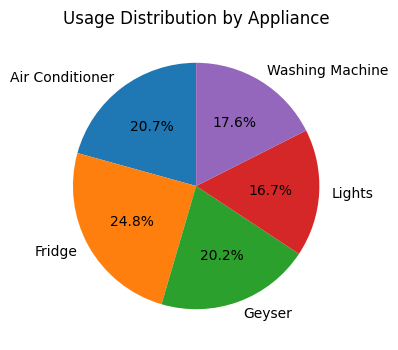

In [61]:
#Appliance Usage Pie Chart

fig, axs = plt.subplots(figsize=(9, 4))
axs.pie(appliance_usage, labels=appliance_usage.index, autopct='%1.1f%%', startangle=90)
axs.set_title("Usage Distribution by Appliance")


Text(0.5, 1.0, 'Room vs Hourly Energy Heatmap')

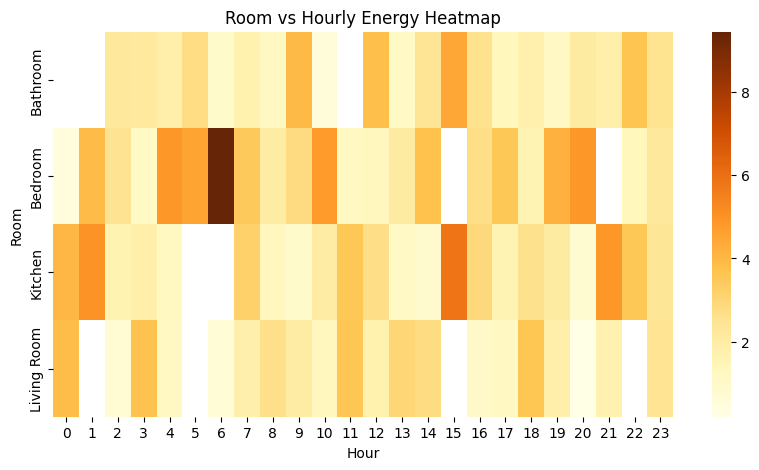

In [62]:
 #Room vs Hour Heatmap

fig, axs = plt.subplots(figsize=(10, 5))
heatmap_data = df.pivot_table(values='Usage_kWh', index='Room', columns='Hour', aggfunc='sum')
sns.heatmap(heatmap_data, ax=axs, cmap="YlOrBr")
axs.set_title("Room vs Hourly Energy Heatmap")


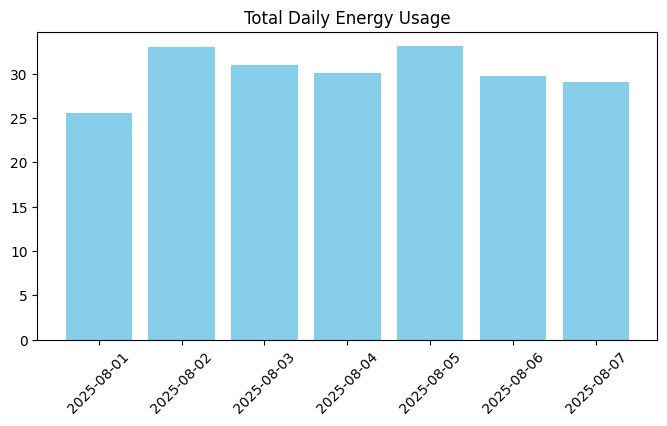

In [ ]:
# Daily Usage Bar Chart

daily_usage = df.groupby('Date')['Usage_kWh'].sum()
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(daily_usage.index.astype(str), daily_usage.values, color='skyblue')
ax.set_title("Total Daily Energy Usage")
ax.tick_params(axis='x', rotation=45)

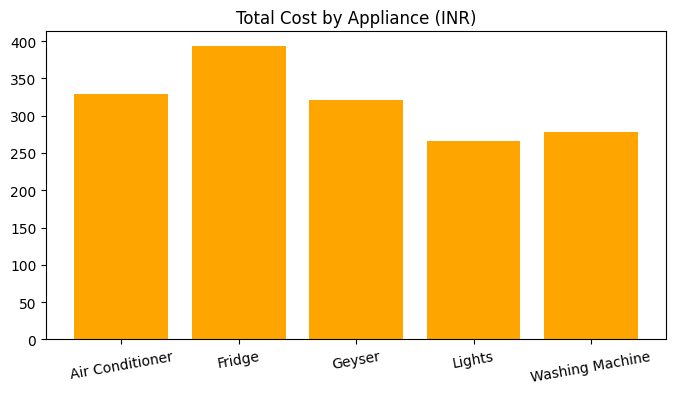

In [64]:
#Cost by Appliance

cost_by_appliance = df.groupby('Appliance')['Cost(INR)'].sum()
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(cost_by_appliance.index, cost_by_appliance.values, color='orange')
ax.set_title("Total Cost by Appliance (INR)")
ax.tick_params(axis='x', rotation=10)

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_27556\2212833731.py:17: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


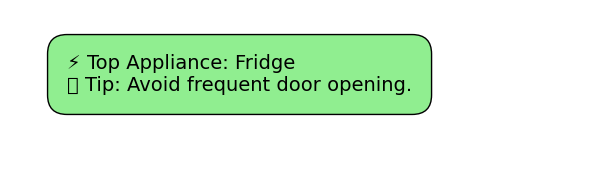

In [65]:
 #Smart Tip Generator

tips = {
    "Air Conditioner": "Set to 25°C & use sleep mode.",
    "Lights": "Use LED & motion sensors.",
    "Geyser": "Limit usage to 10 minutes.",
    "Fridge": "Avoid frequent door opening.",
    "Washing Machine": "Use eco mode & full loads."
}
top_appliance = appliance_usage.idxmax()

fig_tip, ax_tip = plt.subplots(figsize=(6, 2))
ax_tip.axis('off')
ax_tip.text(0.1, 0.5, f"⚡ Top Appliance: {top_appliance}\n💡 Tip: {tips[top_appliance]}",
            fontsize=14, bbox=dict(facecolor='lightgreen', boxstyle='round,pad=1'))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [66]:
#Predict Future Usage with Linear Regression
#Aggregate by Day

daily_df = df.groupby('Date')['Usage_kWh'].sum().reset_index()
daily_df['Day_Index'] = np.arange(len(daily_df))

In [67]:
#Train Linear Regression Model

X = daily_df[['Day_Index']]
y = daily_df['Usage_kWh']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [68]:
#Forecast Next 7 Days

future_index = np.arange(len(daily_df), len(daily_df) + 7).reshape(-1, 1)
future_usage = model.predict(future_index)
future_dates = pd.date_range(start=daily_df['Date'].max() + pd.Timedelta(days=1), periods=7)

c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_27556\2718257341.py:11: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


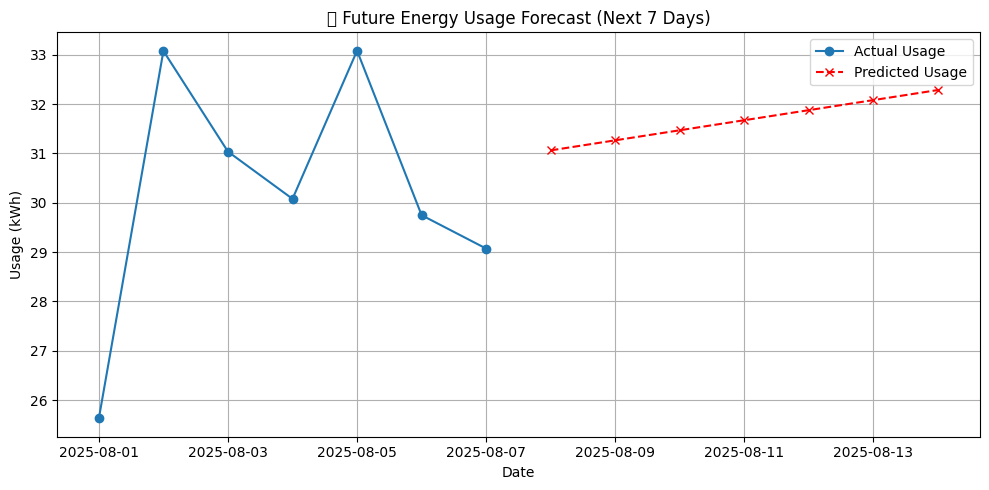

In [69]:
#Plot Forecast vs Actual

plt.figure(figsize=(10, 5))
plt.plot(daily_df['Date'], daily_df['Usage_kWh'], label='Actual Usage', marker='o')
plt.plot(future_dates, future_usage, label='Predicted Usage', linestyle='--', color='red', marker='x')
plt.title("🔮 Future Energy Usage Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Usage (kWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
#Display Forecast

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Usage_kWh': np.round(future_usage, 2)
})
print("\n📊 Predicted Energy Usage for Next 7 Days:\n")
print(forecast_df)


📊 Predicted Energy Usage for Next 7 Days:

        Date  Predicted_Usage_kWh
0 2025-08-08                31.06
1 2025-08-09                31.27
2 2025-08-10                31.47
3 2025-08-11                31.67
4 2025-08-12                31.88
5 2025-08-13                32.08
6 2025-08-14                32.29
